In [143]:
import requests
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

%matplotlib inline

In [539]:
total_confirmed = requests.get('https://covid.ourworldindata.org/data/total_cases.csv')
total_deaths = requests.get('https://covid.ourworldindata.org/data/total_deaths.csv')
new_confirmed = requests.get('https://covid.ourworldindata.org/data/new_cases.csv')
new_deaths = requests.get('https://covid.ourworldindata.org/data/new_deaths.csv')
full_dataset = requests.get('https://covid.ourworldindata.org/data/full_data.csv')

In [540]:
with open('./total_confirmed.csv', 'wb') as f:
    f.write(total_confirmed.content)
    
with open('./total_deaths.csv', 'wb') as f:
    f.write(total_deaths.content)
    
with open('./new_confirmed.csv', 'wb') as f:
    f.write(new_confirmed.content)
    
with open('./new_deaths.csv', 'wb') as f:
    f.write(new_deaths.content)
    
with open('./full_dataset.csv', 'wb') as f:
    f.write(full_dataset.content)

In [541]:
full_dataset = pd.read_csv('full_dataset.csv', parse_dates=['date'])
full_dataset.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1.0,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1.0,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1.0,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1.0,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1.0,NaN


In [542]:
full_dataset = full_dataset.fillna(0)
full_dataset.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,0.0,0.0,1.0,0.0
1,2020-02-26,Afghanistan,0.0,0.0,1.0,0.0
2,2020-02-27,Afghanistan,0.0,0.0,1.0,0.0
3,2020-02-28,Afghanistan,0.0,0.0,1.0,0.0
4,2020-02-29,Afghanistan,0.0,0.0,1.0,0.0


In [543]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2706 entries, 0 to 2705
Data columns (total 6 columns):
date            2706 non-null datetime64[ns]
location        2706 non-null object
new_cases       2706 non-null float64
new_deaths      2706 non-null float64
total_cases     2706 non-null float64
total_deaths    2706 non-null float64
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 127.0+ KB


In [353]:
full_dataset.describe()

,new_cases,new_deaths,total_cases,total_deaths
count,2706.000000,2706.000000,2706.000000,2706.000000
mean,123.409460,4.835920,2535.419069,82.351072
std,799.939528,30.604454,13691.462707,476.972777
min,-10.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000
50%,0.000000,0.000000,9.000000,0.000000
75%,6.000000,0.000000,43.000000,0.000000
max,19572.000000,855.000000,167502.000000,6603.000000


In [381]:
full_dataset = full_dataset.sort_values(['date', 'total_cases'])

In [382]:
full_dataset[full_dataset.total_cases == full_dataset.total_cases.max()]

,date,location,new_cases,new_deaths,total_cases,total_deaths
2705,2020-03-16,World,13968.0,855.0,167502.0,6603.0


In [383]:
world_dataset = full_dataset[full_dataset.location == 'World']
full_dataset = full_dataset[full_dataset.location != 'World']

In [384]:
full_dataset[full_dataset.total_cases == full_dataset.total_cases.max()]

,date,location,new_cases,new_deaths,total_cases,total_deaths
523,2020-03-16,China,29.0,14.0,81077.0,3218.0


## Worldwide Corona cases 

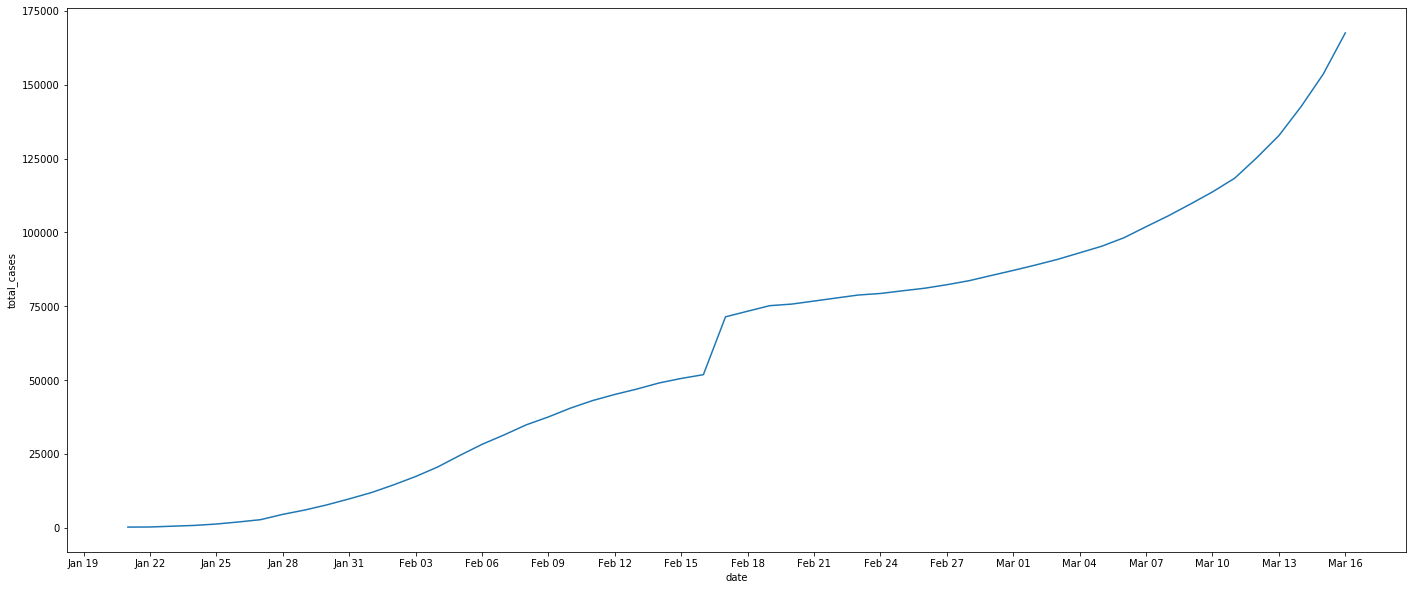

In [385]:
plt.figure(figsize = (24, 10))

ax = sns.lineplot(x="date", y="total_cases", markers=True, data=world_dataset)
ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))


In [359]:
no_china_dataset = full_dataset[full_dataset.location != 'China']

In [360]:
highest_countries = no_china_dataset.nlargest(4, ['date', 'total_cases']).reset_index()
highest_countries

,index,date,location,new_cases,new_deaths,total_cases,total_deaths
0,1232,2020-03-16,Italy,3590.0,368.0,24747.0,1809.0
1,1125,2020-03-16,Iran,2262.0,245.0,14991.0,853.0
2,1930,2020-03-16,South Korea,74.0,0.0,8236.0,75.0
3,2225,2020-03-16,Spain,2000.0,152.0,7753.0,288.0


## Cases of Corona virus excluding China

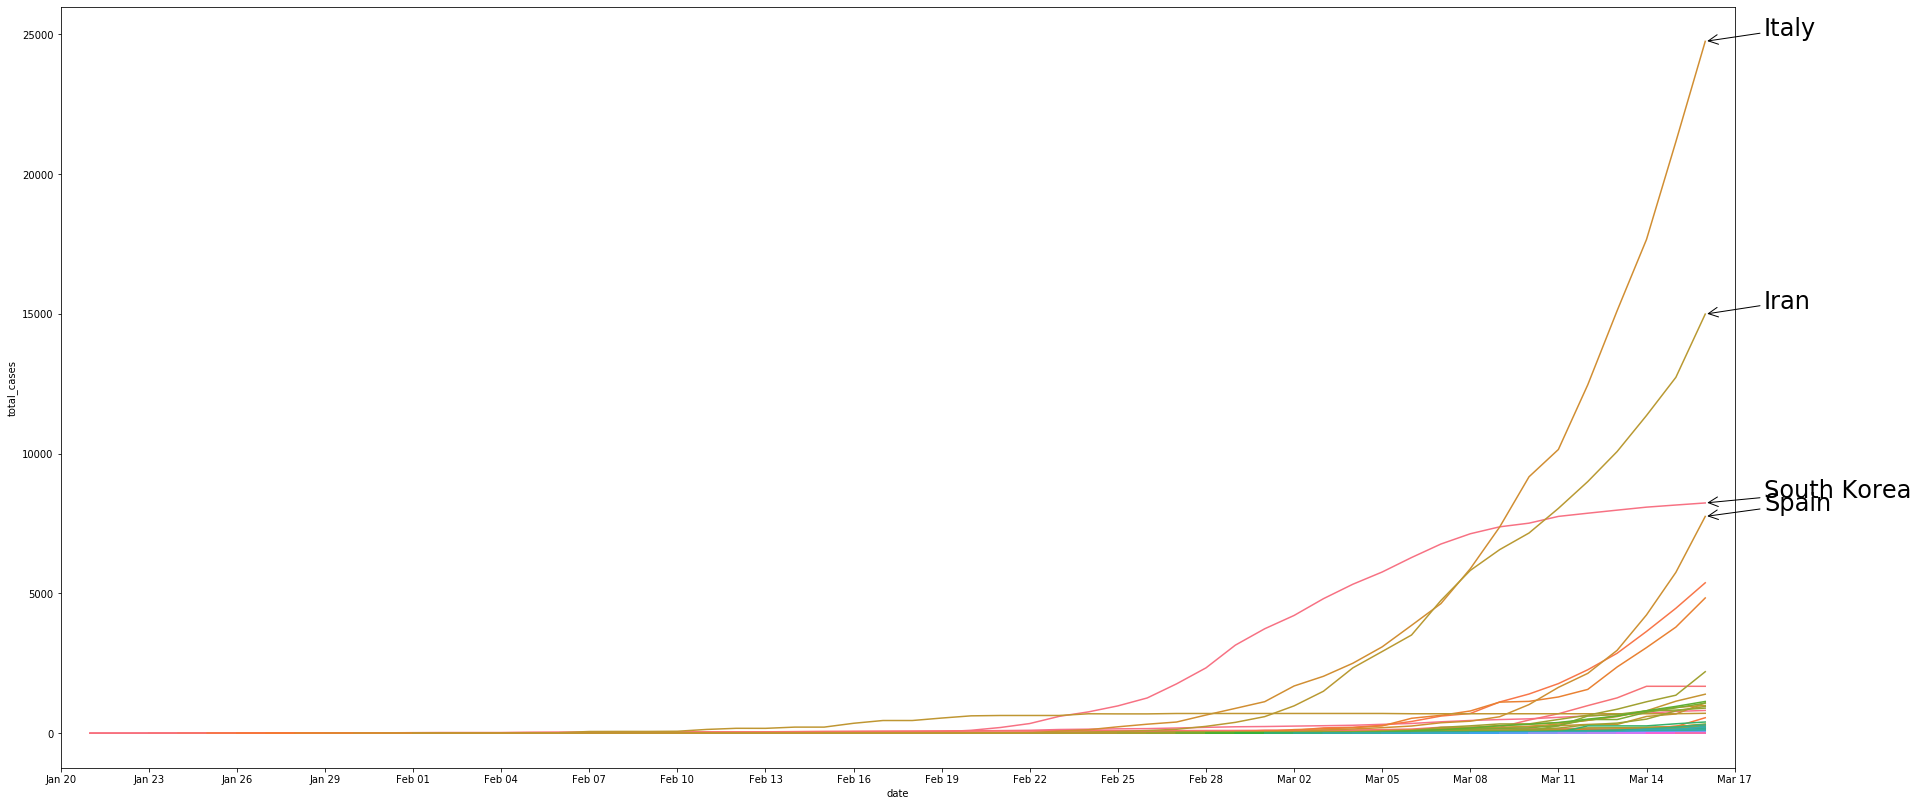

In [361]:

plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=no_china_dataset)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([no_china_dataset.date.min() - datetime.timedelta(days=1), no_china_dataset.date.max() + datetime.timedelta(days=1)])

for i in range(4):
    ax.annotate(highest_countries.iloc[i].location, 
                xy=(no_china_dataset.date.max(), highest_countries.iloc[i].total_cases), fontsize=24,
                xytext=(no_china_dataset.date.max() + datetime.timedelta(days=2),
                        highest_countries.iloc[i].total_cases + 200), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));



## Same as above  but no arrows 

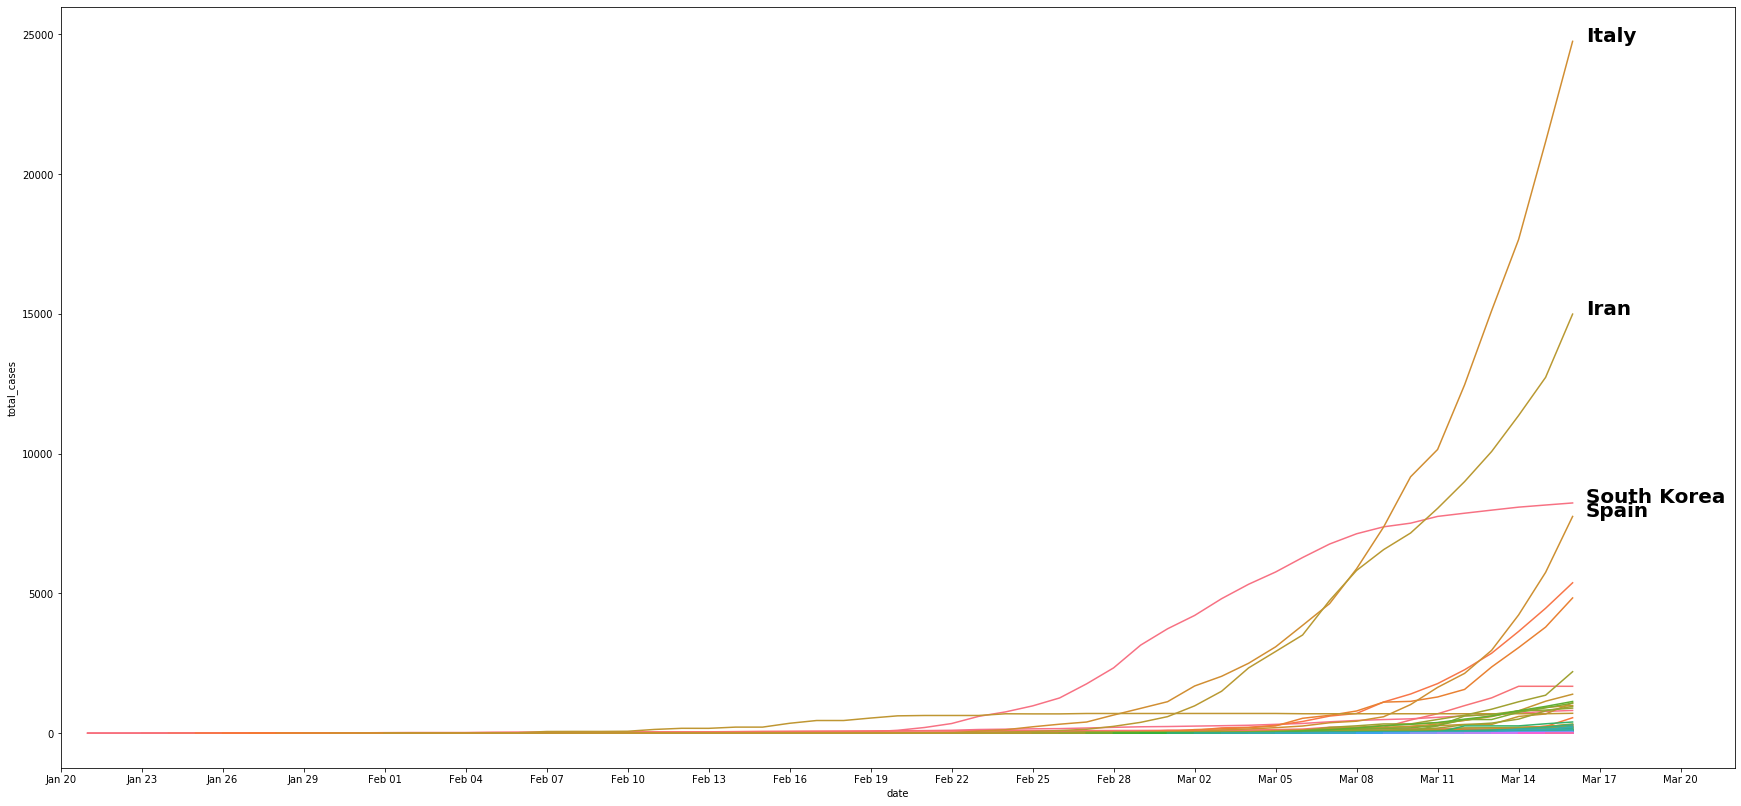

In [364]:
plt.figure(figsize = (30, 14))


ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=no_china_dataset)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([no_china_dataset.date.min() - datetime.timedelta(days=1), no_china_dataset.date.max() + datetime.timedelta(days=6)])


for line in range(0,highest_countries.shape[0]):
     ax.text(highest_countries.date[line] + datetime.timedelta(days=0.5), highest_countries.total_cases[line], highest_countries.location[line], horizontalalignment='left', size='20', color='black', weight='bold')
        


In [362]:
highest_countries_last_week

,index,date,location,new_cases,new_deaths,total_cases,total_deaths
0,1693,2020-03-06,South Korea,518.0,7.0,6284,42.0
1,1077,2020-03-06,Italy,769.0,41.0,3858,148.0
2,978,2020-03-06,Iran,591.0,15.0,3513,107.0
3,954,2020-03-06,International,-10.0,0.0,696,6.0


## Cases of Corona virus excluding China last week

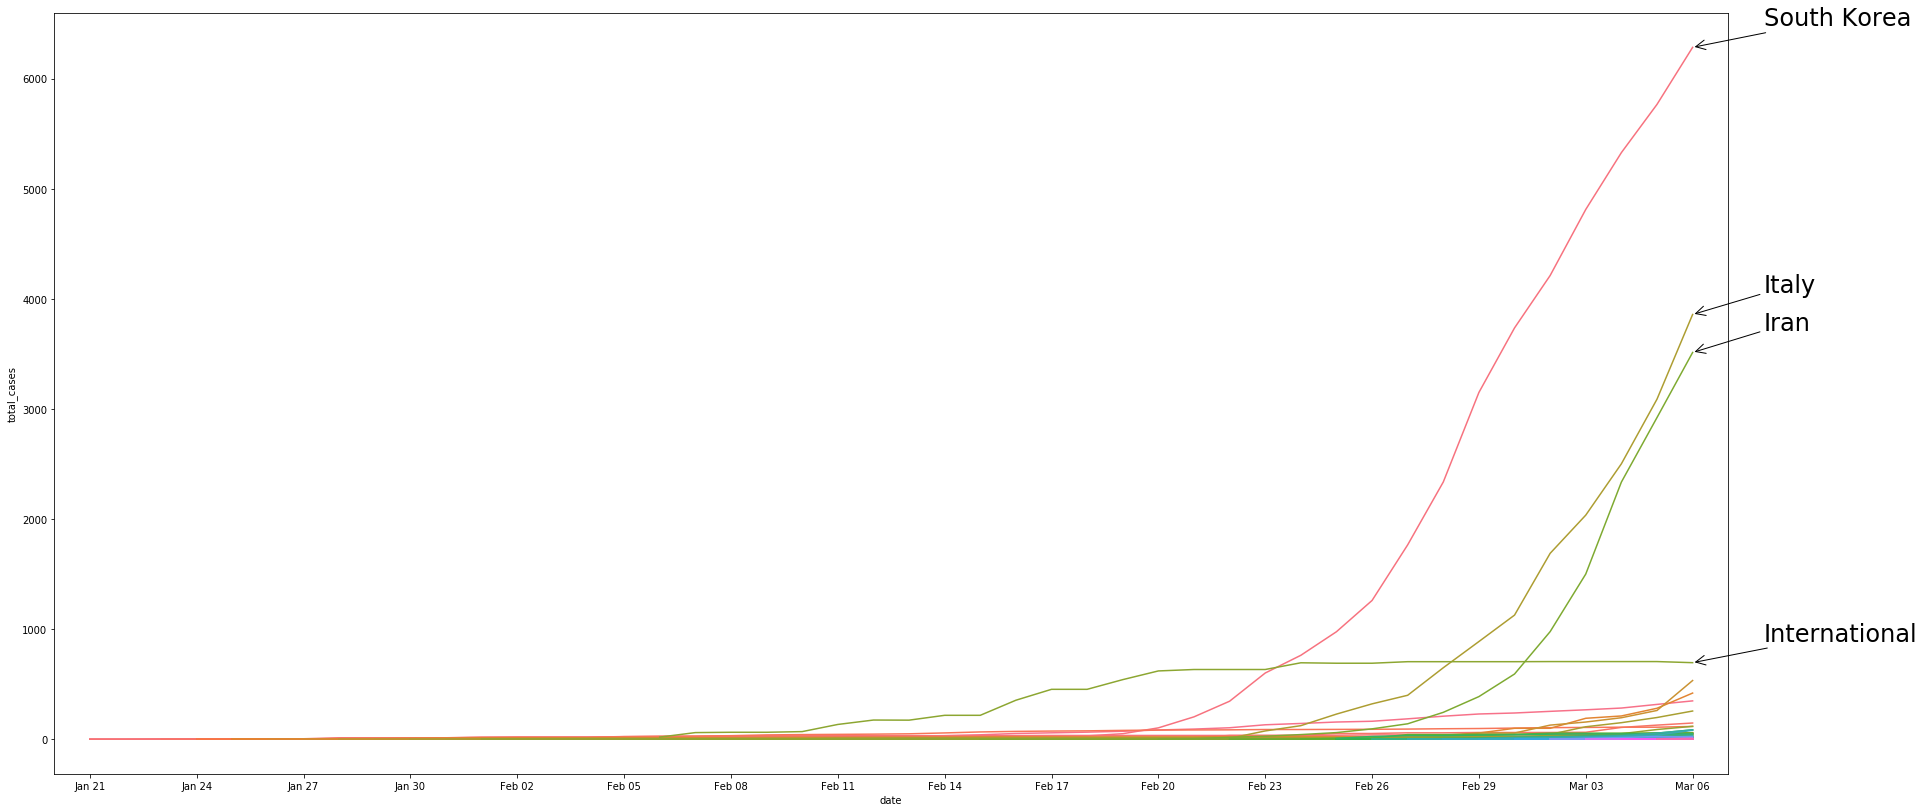

In [363]:
plt.figure(figsize = (30, 14))

one_week_ago = no_china_dataset[no_china_dataset.date < '2020-03-7']
highest_countries_last_week = one_week_ago.nlargest(4, ['date', 'total_cases']).reset_index()
highest_countries_last_week

ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=one_week_ago)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([one_week_ago.date.min() - datetime.timedelta(days=1), one_week_ago.date.max() + datetime.timedelta(days=1)])

for i in range(4):
    ax.annotate(highest_countries_last_week.iloc[i].location, 
                xy=(one_week_ago.date.max(), highest_countries_last_week.iloc[i].total_cases), fontsize=24,
                xytext=(one_week_ago.date.max() + datetime.timedelta(days=2),
                        highest_countries_last_week.iloc[i].total_cases + 200), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));

In [365]:
no_outliers = no_china_dataset[~ no_china_dataset.location.isin(highest_countries.location)]
highest_no_outliers = no_outliers.nlargest(10, ['date', 'total_cases']).reset_index()
highest_no_outliers

,index,date,location,new_cases,new_deaths,total_cases,total_deaths
0,818,2020-03-16,France,911.0,36.0,5380.0,127.0
1,903,2020-03-16,Germany,1043.0,4.0,4838.0,12.0
2,2343,2020-03-16,Switzerland,841.0,2.0,2200.0,13.0
3,2591,2020-03-16,United States,0.0,0.0,1678.0,41.0
4,2444,2020-03-16,United Kingdom,251.0,14.0,1395.0,35.0
5,1630,2020-03-16,Netherlands,176.0,8.0,1135.0,20.0
6,269,2020-03-16,Belgium,396.0,0.0,1085.0,5.0
7,1704,2020-03-16,Norway,170.0,0.0,1077.0,1.0
8,2323,2020-03-16,Sweden,68.0,0.0,992.0,3.0
9,165,2020-03-16,Austria,159.0,0.0,959.0,1.0


## Excluding outliers, (Italy, Iran, Sk, Spain)

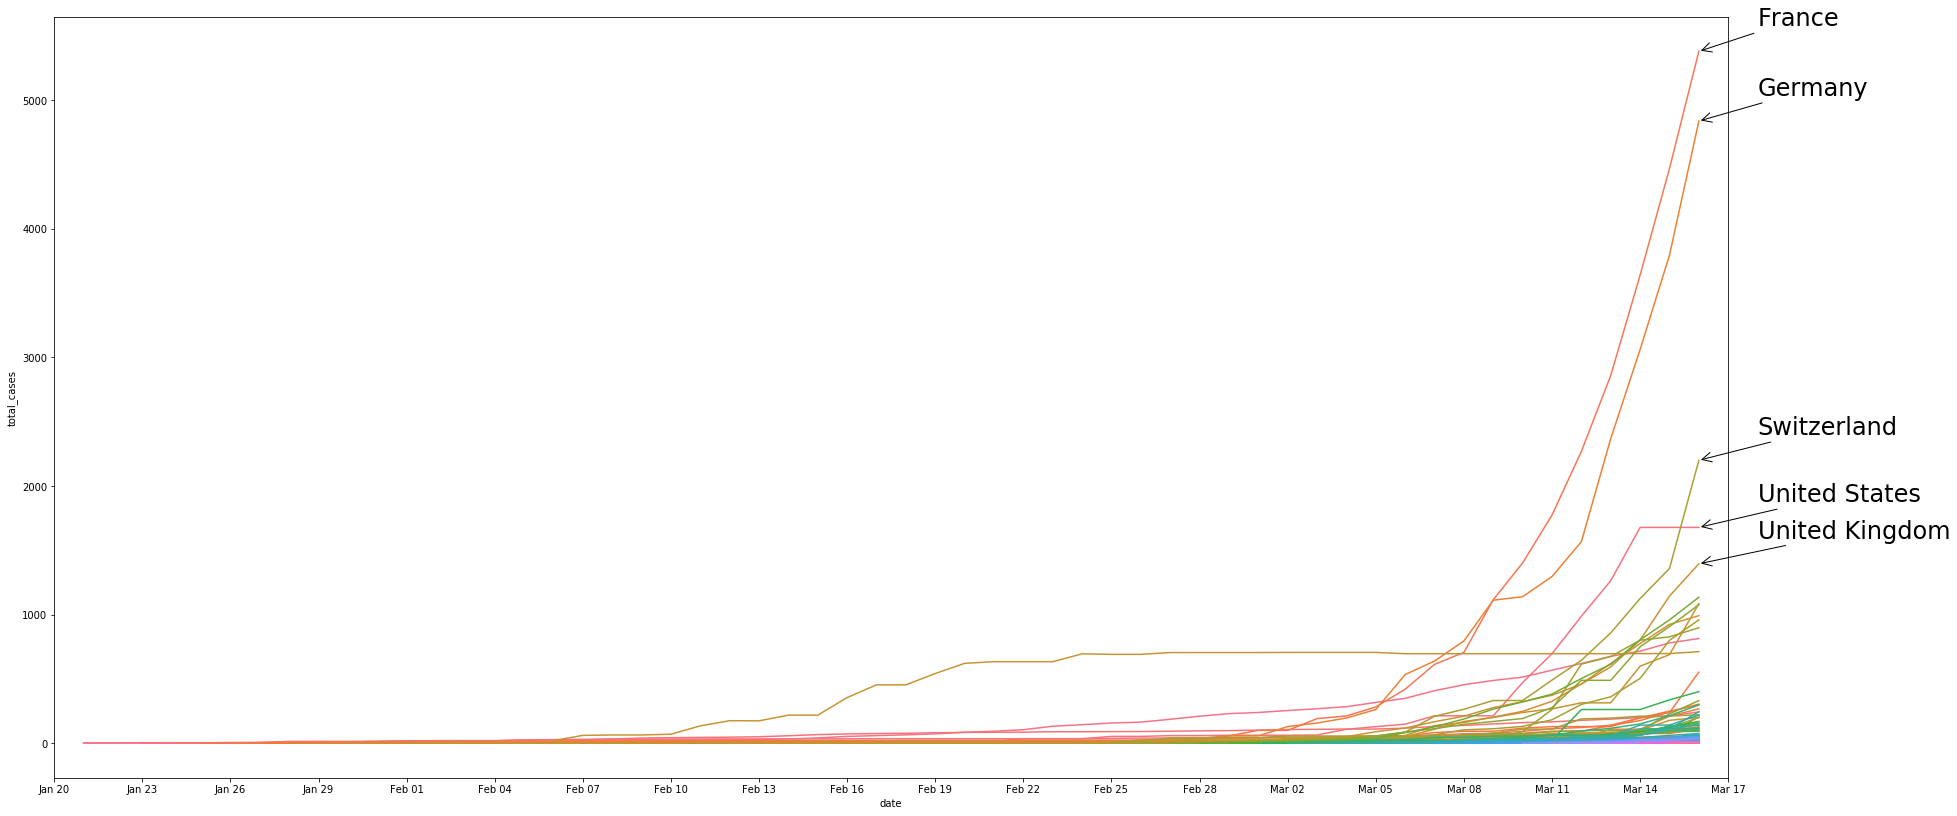

In [366]:
plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=no_outliers)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([no_outliers.date.min() - datetime.timedelta(days=1), no_outliers.date.max() + datetime.timedelta(days=1)])

for i in range(5):
    ax.annotate(highest_no_outliers.iloc[i].location, 
                xy=(no_outliers.date.max(), highest_no_outliers.iloc[i].total_cases), fontsize=24,
                xytext=(no_outliers.date.max() + datetime.timedelta(days=2),
                        highest_no_outliers.iloc[i].total_cases + 200), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));



In [544]:
# Saudi + Italy + Iran + SK
# siik = no_china_dataset[no_china_dataset.location.isin(['Italy', 'Iran', 'South Korea', 'Saudi Arabia'])]
siik = no_china_dataset[no_china_dataset.location.isin(['Saudi Arabia', 'Iraq', 'Kuwait', 'Bahrain', 'United Arab Emirates'])]
siik_highest = siik.nlargest(5, ['date', 'total_cases']).reset_index()
siik_highest

,index,date,location,new_cases,new_deaths,total_cases,total_deaths
0,202,2020-03-16,Bahrain,10.0,0.0,221.0,1.0
1,1146,2020-03-16,Iraq,31.0,0.0,124.0,9.0
2,1339,2020-03-16,Kuwait,0.0,0.0,112.0,0.0
3,2068,2020-03-16,Saudi Arabia,0.0,0.0,103.0,0.0
4,2537,2020-03-16,United Arab Emirates,13.0,0.0,98.0,0.0


## only Saudi

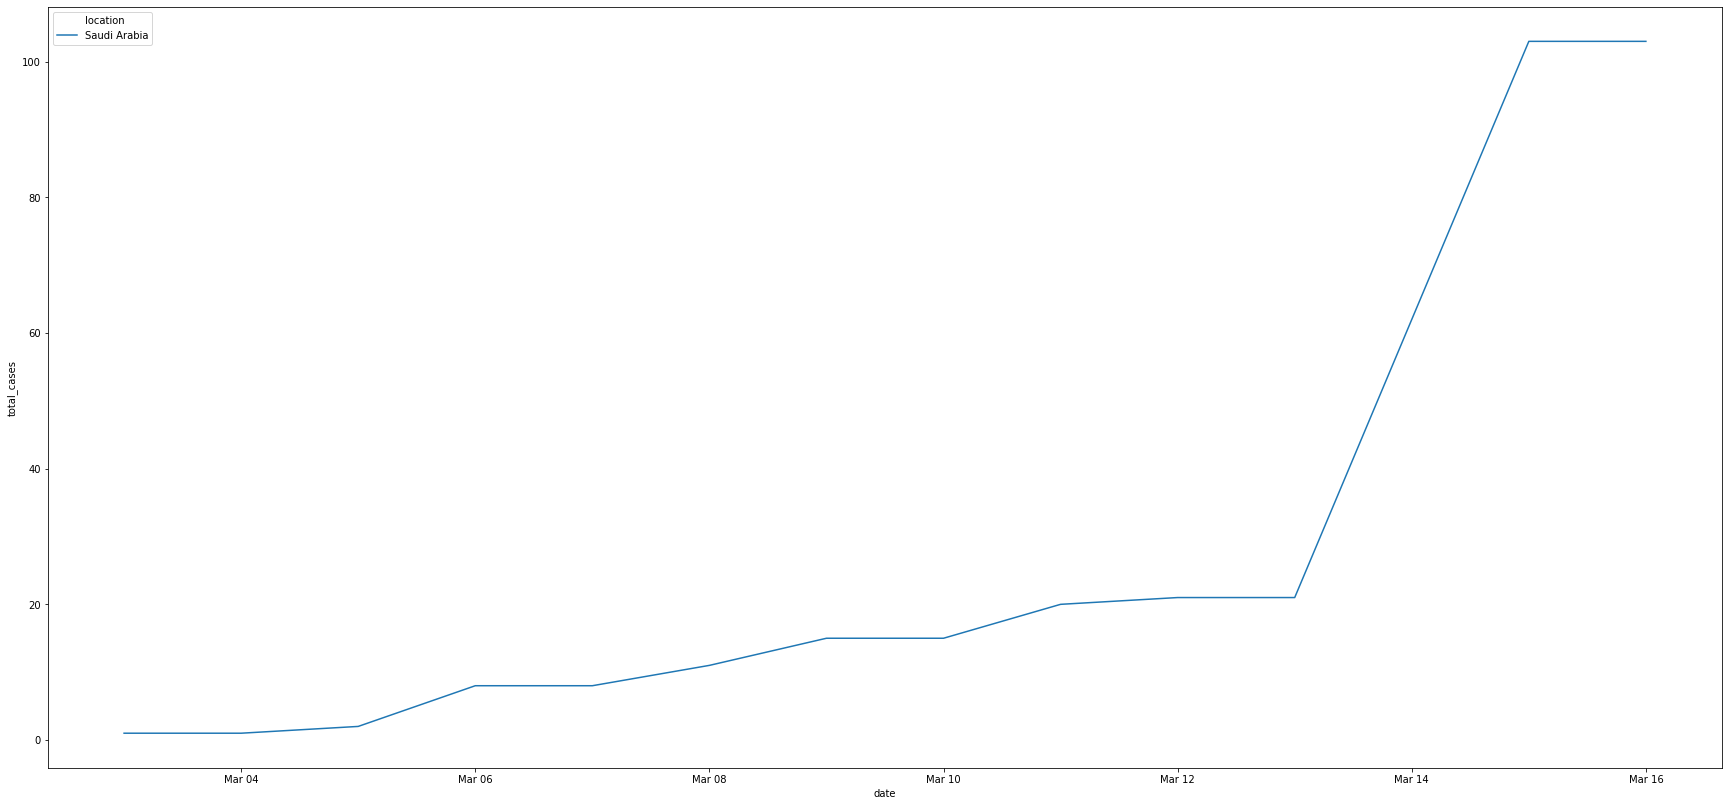

In [446]:
plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="location",  data=siik[siik.location == 'Saudi Arabia'])

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

# ax.set_xlim([siik.date.min() - datetime.timedelta(days=1), siik.date.max() + datetime.timedelta(days=1)])

## Random Arab Contries

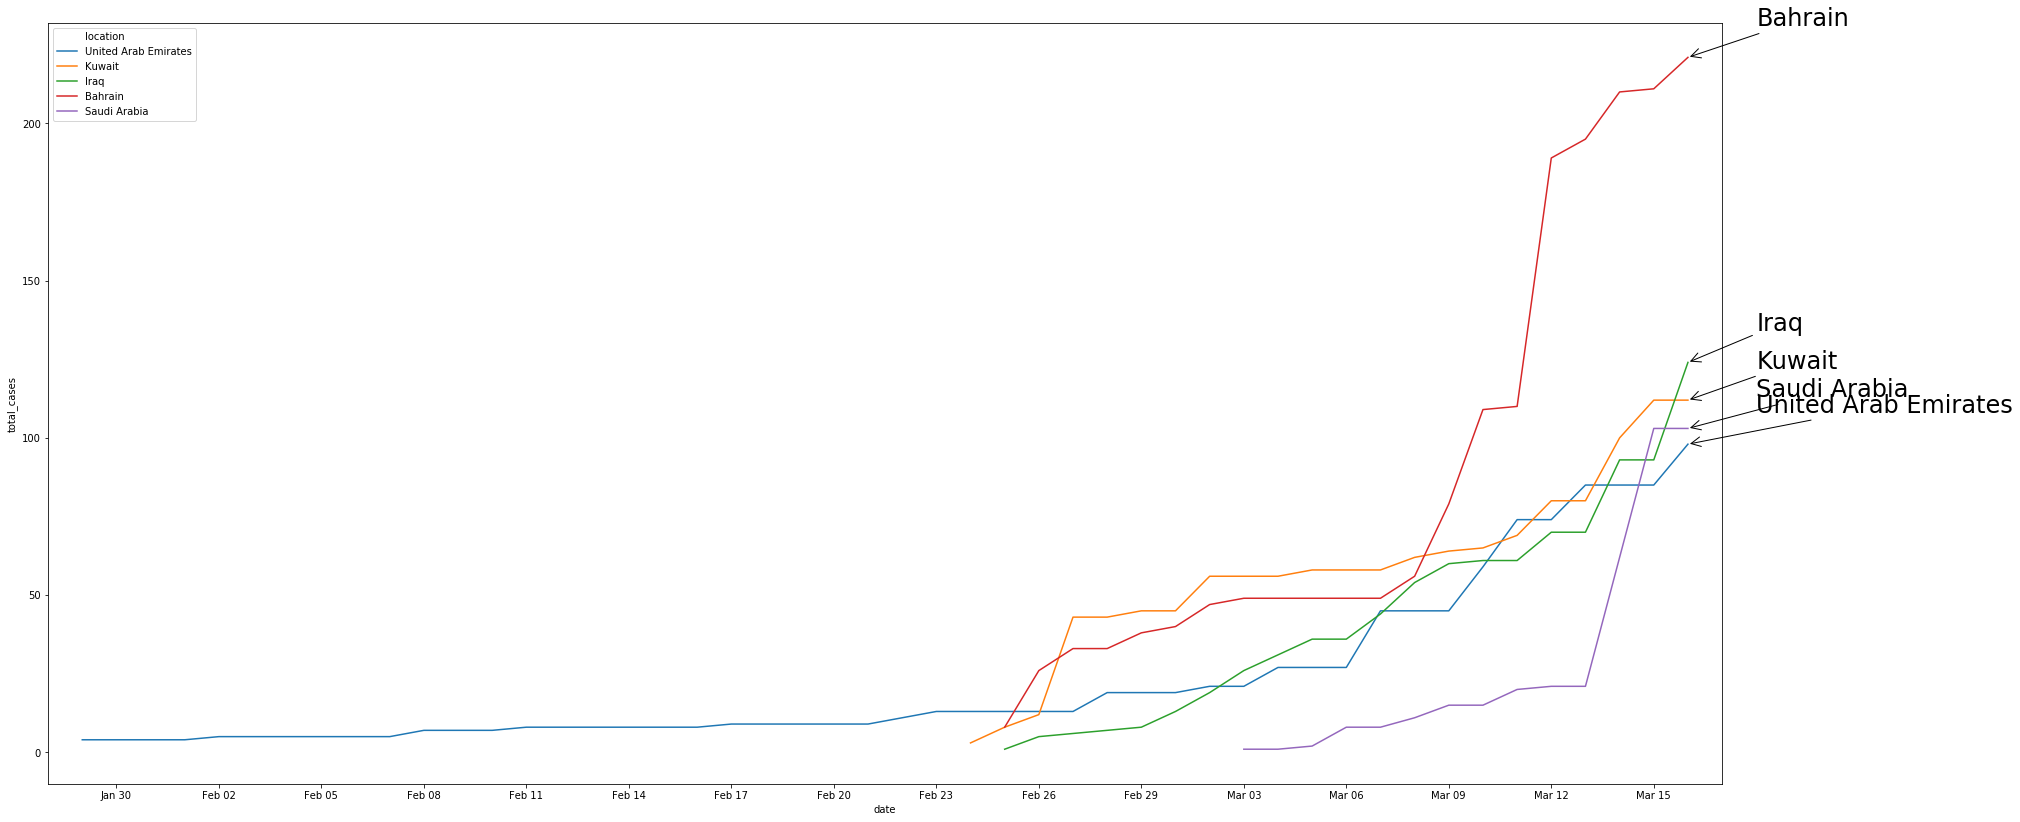

In [548]:
plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="location",  data=siik)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([siik.date.min() - datetime.timedelta(days=1), siik.date.max() + datetime.timedelta(days=1)])

for i in range(5):
    ax.annotate(siik_highest.iloc[i].location, 
                xy=(siik.date.max(), siik_highest.iloc[i].total_cases), fontsize=24,
                xytext=(siik.date.max() + datetime.timedelta(days=2),
                        siik_highest.iloc[i].total_cases + 10), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));


## Week period 

In [489]:
def num_of_week(date, location):
    start_date = siik.date[siik.location == location].min()
    week_num = (date - start_date)
    
    return int(week_num / np.timedelta64(1, 'W')) + 1

    

In [549]:
siik['week'] = siik.apply(lambda x: num_of_week(x['date'], x['location']), axis=1)
siik = siik.sort_values(['date', 'total_cases'])
siik_highest = siik.nlargest(3, ['date', 'total_cases']).reset_index()

/Users/mohammedalawami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [572]:
siik[(siik.location == 'Saudi Arabia') & (siik.week == 2)]

,date,location,new_cases,new_deaths,total_cases,total_deaths,week
2062,2020-03-10,Saudi Arabia,0.0,0.0,15.0,0.0,2
2063,2020-03-11,Saudi Arabia,5.0,0.0,20.0,0.0,2
2064,2020-03-12,Saudi Arabia,1.0,0.0,21.0,0.0,2
2065,2020-03-13,Saudi Arabia,0.0,0.0,21.0,0.0,2
2066,2020-03-14,Saudi Arabia,41.0,0.0,62.0,0.0,2
2067,2020-03-15,Saudi Arabia,41.0,0.0,103.0,0.0,2
2068,2020-03-16,Saudi Arabia,0.0,0.0,103.0,0.0,2


(0, 221)

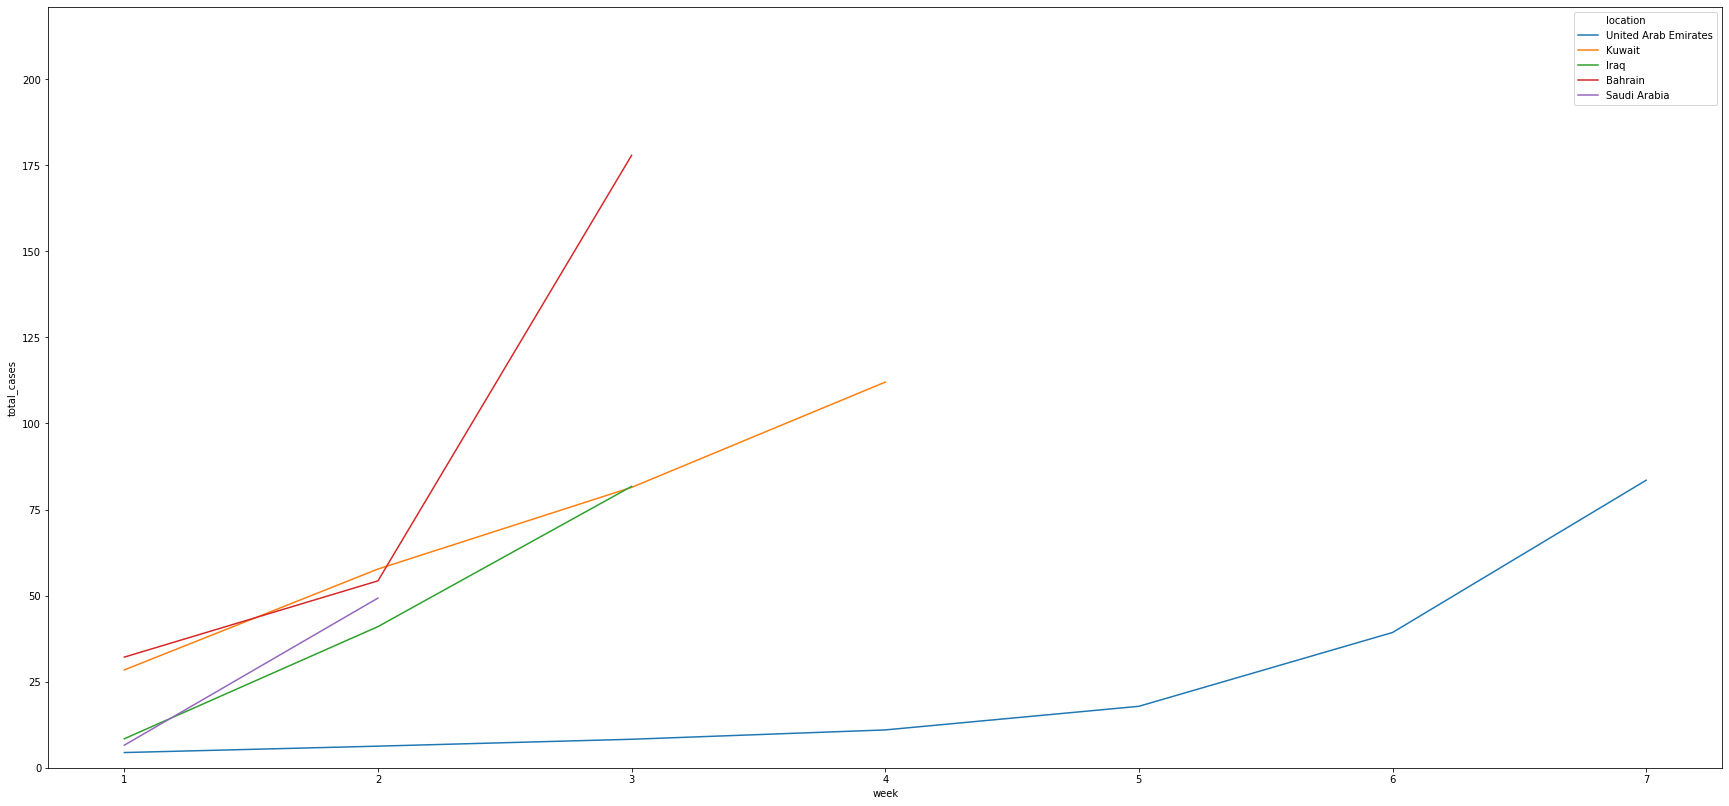

In [558]:
plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="week", y="total_cases", hue="location", ci=None,  data=siik)
ax.set_ylim([0, 221])
# for line in range(0,siik_highest.shape[0]):
#      ax.text(siik_highest.week[line] , siik_highest.total_cases[line], siik_highest.location[line], horizontalalignment='left', size='20', color='black', weight='bold')

# Weather Data

In [330]:
china = pd.read_csv('China.csv')
china.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2020-01-22 00:00:00,7,-1,0.0,8.7,1,1,11,05:14 AM,02:51 PM,...,-1,6,6,37,0.0,1025,1,10,4,5
1,2020-01-22 12:00:00,7,-1,0.0,8.7,1,1,11,05:14 AM,02:51 PM,...,4,4,2,31,0.0,1024,4,10,55,3
2,2020-01-23 00:00:00,7,1,0.0,8.7,1,1,3,06:13 AM,03:44 PM,...,1,5,18,43,0.0,1026,1,10,241,3
3,2020-01-23 12:00:00,7,1,0.0,8.7,1,1,3,06:13 AM,03:44 PM,...,4,12,1,37,0.0,1030,6,10,22,10
4,2020-01-24 00:00:00,3,-6,0.0,8.7,1,1,0,07:05 AM,04:40 PM,...,0,7,15,50,0.0,1037,1,10,115,5


In [339]:
saudi = pd.read_csv('saudi.csv')
saudi.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2020-01-22 00:00:00,22,19,0.0,11.0,1,1,11,04:50 AM,03:57 PM,...,20,39,34,68,0.0,1017,20,10,349,29
1,2020-01-22 12:00:00,22,19,0.0,11.0,1,1,11,04:50 AM,03:57 PM,...,22,35,0,51,0.0,1017,22,10,333,31
2,2020-01-23 00:00:00,23,18,0.0,11.0,1,1,3,05:46 AM,04:51 PM,...,19,33,0,56,0.0,1017,19,10,357,25
3,2020-01-23 12:00:00,23,18,0.0,11.0,1,1,3,05:46 AM,04:51 PM,...,21,23,0,34,0.0,1018,21,10,322,20
4,2020-01-24 00:00:00,23,18,0.0,11.0,1,1,0,06:38 AM,05:46 PM,...,20,33,0,46,0.0,1019,20,10,355,24
